# Exercise 15

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/15_fraud_detection.csv.zip'
df = pd.read_csv(url, index_col=0)
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [3]:
df.shape, df.Label.sum(), df.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

# Exercise 15.1

Estimate a Logistic Regression and a Decision Tree

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [51]:
X = df.drop(['Label'], axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

y.value_counts()

0    137924
1       797
Name: Label, dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler

#Standarizar datos:

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Text(0,0.5,'Varianza acumulativa')

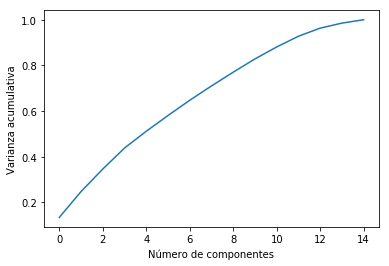

In [9]:
#PCA
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_s)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulativa')

De la gráfica se infiere que n_components = 10 (explican el 80% de los datos).

In [11]:
PCA_1 = PCA(n_components = 10)
# Fit PCA on training set
PCA_1.fit(X_train_s)
# Apply the mapping (transform) to both the training set and the test set.
X_train = PCA_1.transform(X_train_s)
X_test = PCA_1.transform(X_test_s)
y_test = PCA_1.transform(y_test)

print("Total explanation: ",sum(PCA_1.explained_variance_ratio_))

Total explanation:  0.8284903056008417


In [ ]:
X = df.drop(['Label'], axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

### LogisticRegression

In [52]:
logreg = LogisticRegression(solver='liblinear',C=1e9)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [53]:
print("Accuracy:",metrics.accuracy_score(y_pred, y_test))
print("F1-score:",metrics.f1_score(y_pred, y_test))
print("F_Beta-Score:",metrics.fbeta_score(y_pred, y_test,10))

Accuracy: 0.9939053693914107
F1-score: 0.0
F_Beta-Score: 0.0


In [54]:
accuracy_scores = []
accuracy_scores.append(['-','logistic', -1, -1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])

### Decision Tree

In [55]:
# instantiate a DecisionTreeRegressor (with random_state=1)

arbol = DecisionTreeClassifier(random_state=1)
arbol

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [56]:
arbol.fit(X_train,y_train)
y_pred = arbol.predict(X_test)

In [57]:
print("Accuracy:",metrics.accuracy_score(y_pred, y_test))
print("F1-score:",metrics.f1_score(y_pred, y_test))
print("F_Beta-Score:",metrics.fbeta_score(y_pred, y_test,10))

Accuracy: 0.9886408318406221
F1-score: 0.12457912457912457
F_Beta-Score: 0.11614607614607615


In [58]:
accuracy_scores.append(['-','DecisionTree', -1, -1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])

# Exercise 15.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [59]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

In [60]:
# Plot the original data
import matplotlib.pyplot as plt
def plot_two_classes(X, y, subplot=False, size=(10, 10)):
    # Plot the two classes
    
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=size)
        
    subplot.scatter(X[y==0, 0], X[y==0, 1], label="Class #0", 
                    alpha=0.5, s=70)
    subplot.scatter(X[y==1, 0], X[y==1, 1], label="Class #1", 
                    alpha=0.5, s=70)
    subplot.legend()
    return subplot

In [61]:
X_test.shape

(45778, 15)

In [67]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    X_u, y_u = UnderSampling(X, y, target_percentage, 1)
    
    logreg.fit(X_u,y_u)
    y_pred=logreg.predict(X_test)
    accuracy_scores.append(['under-sampling','logistic',target_percentage,-1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   

    arbol.fit(X_u,y_u)
    y_pred=arbol.predict(X_test)
    accuracy_scores.append(['under-sampling','DecisionTree',target_percentage,-1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   
 
    print("Accuracy:",metrics.accuracy_score(y_pred, y_test),"F1-Score:",metrics.f1_score(y_pred, y_test),"F-Beta:",metrics.fbeta_score(y_pred, y_test,10))

Accuracy: 0.9318231464895802 F1-Score: 0.14843110504774898 F-Beta: 0.08097266229459878
Accuracy: 0.859736117785836 F1-Score: 0.0781048097631012 F-Beta: 0.04104740203952038
Accuracy: 0.8003844641530866 F1-Score: 0.056576502168077636 F-Beta: 0.029397423980879033
Accuracy: 0.7364236095941282 F1-Score: 0.043443792611384174 F-Beta: 0.022423076143982822
Accuracy: 0.6818122242125039 F1-Score: 0.03638528711299286 F-Beta: 0.018711578947368423
Accuracy: 0.6425575604001922 F1-Score: 0.03251936380299178 F-Beta: 0.016690954434145096
Accuracy: 0.5905238324085805 F1-Score: 0.028504793988079816 F-Beta: 0.014600938350133394


# Exercise 15.3

Same analysis using random-over-sampling

In [68]:
X = df.drop(['Label'], axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [71]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X.iloc[filter_], y.iloc[filter_]

In [73]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = OverSampling(X_train, y_train, target_percentage, 42)
########## logistic regression #############  
    logreg.fit(X_u,y_u)
    y_pred=logreg.predict(X_test)
    accuracy_scores.append(['over-sampling','logistic',target_percentage,-1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   
########## decision tree#############    
    arbol.fit(X_u,y_u)
    y_pred=arbol.predict(X_test)
    accuracy_scores.append(['over-sampling','DecisionTree',target_percentage,-1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   
    
    print("Accuracy:",metrics.accuracy_score(y_pred, y_test),"F1-Score:",metrics.f1_score(y_pred, y_test),"FBeta:",metrics.fbeta_score(y_pred, y_test,10))
   

Accuracy: 0.9890558783695225 F1-Score: 0.12869565217391304 FBeta: 0.12343517753922378
Accuracy: 0.9896238367774913 F1-Score: 0.1316270566727605 FBeta: 0.13233848953594177
Accuracy: 0.9897330595482546 F1-Score: 0.14233576642335768 FBeta: 0.1428467815049864
Accuracy: 0.9897985932107126 F1-Score: 0.12710280373831775 FBeta: 0.1306945765937203
Accuracy: 0.9896238367774913 F1-Score: 0.1252302025782689 FBeta: 0.12683287165281626


# Exercise 15.4 (3 points)

Evaluate the results using SMOTE

Which parameters did you choose?

In [80]:
n_samples = y.shape[0]
n_samples_0 = (y == 0).sum()
n_samples_1 = (y == 1).sum()

In [82]:
def SMOTE(X, y, target_percentage=0.5, k=5, seed=None):
    
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1].iloc[sel] - step * (X[y==1].iloc[sel] - X[y==1].iloc[nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

In [84]:
for target_percentage in [0.25, 0.5]:
    for k in [5, 15]:
        X_u, y_u = SMOTE(X_train, y_train, target_percentage, k, seed=3)
        logreg.fit(X_u,y_u)
        y_pred=logreg.predict(X_test)
        accuracy_scores.append(['SMOTE','logistic',target_percentage,k,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   

        arbol.fit(X_u,y_u)
        y_pred=arbol.predict(X_test)
        accuracy_scores.append(['SMOTE','DecisionTree',target_percentage,k,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   

        print("Accuracy:",metrics.accuracy_score(y_pred, y_test),"F1-Score:",metrics.f1_score(y_pred, y_test),"FBeta:",metrics.fbeta_score(y_pred, y_test,10))


Accuracy: 0.9854733714884879 F1-Score: 0.0877914951989026 FBeta: 0.0707608100711549
Accuracy: 0.9809078596705841 F1-Score: 0.07610993657505287 FBeta: 0.053966604823747676
Accuracy: 0.9837913408187339 F1-Score: 0.09068627450980393 FBeta: 0.0687264367816092
Accuracy: 0.9792695181091354 F1-Score: 0.07414634146341463 FBeta: 0.05098638326137496


# Exercise 15.5 (3 points)

Evaluate the results using Adaptive Synthetic Sampling Approach for Imbalanced
Learning (ADASYN)

http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#rf9172e970ca5-1

In [100]:
from collections import Counter
from imblearn.over_sampling import ADASYN


In [101]:
from sklearn.datasets import make_classification

ImportError: cannot import name 'IS_PYPY' from 'sklearn.utils' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\__init__.py)

In [ ]:
X, y = make_classification(n_classes=2, class_sep=2,weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Dataset original' % Counter(y))

adasyn1 = ADASYN(random_state=1)
X_u, y_u = adasyn1.fit_resample(X, y)
print('Resampled Dataset' % Counter(y_u))

In [ ]:
for target_percentage in np.arange(0.05,0.55, 0.05):
        adasyn1 = ADASYN(random_state=1)
        X_u, y_u  = adasyn1.fit_resample(X_train, y_train)
            
        logreg.fit(X_u,y_u)
        y_pred=rf.predict(X_test)
        accuracy_scores.append(['ADASYN','reg-log',target_percentage,-1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   

        arbol.fit(X_u,y_u)
        y_pred=arbol.predict(X_test)
        accuracy_scores.append(['ADASYN','DecisionTree',target_percentage,-1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   

        print("Accuracy:",metrics.accuracy_score(y_pred, y_test),"F1-Score:",metrics.f1_score(y_pred, y_test),"FBeta:",metrics.fbeta_score(y_pred, y_test,10))


# Exercise 15.6 (3 points)

Compare and comment about the results